In [2]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features

# extract features from all images
directory = 'Flickr8k_Dataset/Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features_flickr.pkl', 'wb'))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

>3586239953_da4fb3f775.jpg
>297724467_e8918a6f90.jpg
>3418504074_083f0bb68d.jpg
>400851260_5911898657.jpg
>1130369873_d80a1aa59c.jpg
>2540751930_d71c7f5622.jpg
>146577646_9e64b8c2dc.jpg
>3544573946_e03aebbfde.jpg
>119534510_d52b3781a3.jpg
>537532165_e4b7c0e61a.jpg
>3656206975_09e6ce58bd.jpg
>2204550058_2707d92338.jpg
>2460477085_088e25f857.jpg
>3713324467_104d72f7db.jpg
>3757598567_739b7da835.jpg
>3249891874_6a090ef097.jpg
>244368383_e90b6b2f20.jpg
>3741827382_71e93298d0.jpg
>3554210976_fbd0ef33a3.jpg
>2836864045_9a093cfd65.jpg
>2250555512_71670078f5.jpg
>241346471_c756a8f139.jpg
>3139160252_75109e9e05.jpg
>519228867_2fd25e38d4.jpg
>3655326478_4472c5c630.jpg
>458735196_176e7df6b3.jpg
>3481884992_45770ec698.jpg
>2600867924_cd502fc911.jpg
>3542425197_2ef81c6051.jpg
>688210930_85c5675d5b.jpg
>2372572028_53b76104a9.jpg
>3143982558_9e2d44c155.jpg
>3271061953_700b96520c.jpg
>2683985894_167d267dcb.jpg
>241347300_7c84ecf764.jpg
>1579206585_5ca6a24db0.jpg
>2474047296_fd9179d438.jpg
>3684518763_

>442220883_ff3d6e507f.jpg
>1332722096_1e3de8ae70.jpg
>2744705147_acd767d3eb.jpg
>3139895886_5a6d495b13.jpg
>3532593368_be10432e92.jpg
>3495490064_8db40a83af.jpg
>688940111_325a74674a.jpg
>3415178926_909db9400b.jpg
>2920969723_83918fe909.jpg
>495340319_705f2e63d6.jpg
>2470493181_2efbbf17bd.jpg
>979201222_75b6456d34.jpg
>53043785_c468d6f931.jpg
>1138784872_69ade3f2ab.jpg
>343662720_39e4067cd1.jpg
>2943334864_6bab479a3e.jpg
>3666169738_a8c74cf745.jpg
>3333017828_b930b9d41b.jpg
>486712504_36be449055.jpg
>2261169495_98254e2e66.jpg
>2290330500_e7bdaa58e1.jpg
>3415589320_71a5bf64cf.jpg
>2217328285_b1d55c17ca.jpg
>300922408_05a4f9938c.jpg
>1505686764_9e3bcd854a.jpg
>3458215674_2aa5e64643.jpg
>3638440337_6d5c19a8f0.jpg
>3205754736_32c29b5208.jpg
>2879241506_b421536330.jpg
>3033257301_e2c8a39b04.jpg
>3569420080_72fbe84751.jpg
>3211316116_a2462e327d.jpg
>3517466790_17c7753a1a.jpg
>3317960829_78bbfafbb6.jpg
>535309053_ec737abde8.jpg
>3432730942_4dc4685277.jpg
>1115679311_245eff2f4b.jpg
>3524612244

>3412822878_5d961492e5.jpg
>325005410_e1ff5041b5.jpg
>3043908909_bb54d2c08e.jpg
>2337919839_df83827fa0.jpg
>2860202109_97b2b22652.jpg
>2199083344_3aa77f4879.jpg
>2264316030_600e55748d.jpg
>2928835996_88b9f9503d.jpg
>3471117376_40585c3fd1.jpg
>263850317_5bb3a18a08.jpg
>3532098999_4e07a0a17e.jpg
>3141440149_00becbbb93.jpg
>494221578_027f51cdf4.jpg
>3323076458_3ce72a1dae.jpg
>3564157681_03a13b7112.jpg
>1659358141_0433c9bf99.jpg
>2952141476_fc9a48a60a.jpg
>2831578193_3c997ae330.jpg
>832128857_1390386ea6.jpg
>3414734842_beb543f400.jpg
>3210457502_c6030ce567.jpg
>2286236765_2a63eeb550.jpg
>3541491057_61a49588d9.jpg
>441921713_1cafc7d7d2.jpg
>444057017_f1e0fcaef7.jpg
>3597921737_3fd1d0665b.jpg
>3469585782_e708496552.jpg
>2752043092_f48ebfeaa2.jpg
>3699318394_6193f2c8e0.jpg
>3661239105_973f8216c4.jpg
>190638179_be9da86589.jpg
>265528702_8653eab9fa.jpg
>2157003092_eaeb977789.jpg
>1466307489_cb8a74de09.jpg
>3314517351_69d70e62bd.jpg
>3572346664_e1e6c77f11.jpg
>3445544288_68fdb25969.jpg
>28139929

>111537217_082a4ba060.jpg
>3252985078_c4ee2aca4e.jpg
>689776124_07f560a920.jpg
>1357689954_72588dfdc4.jpg
>2220185725_45d4fa68d9.jpg
>374103776_0de490c1b0.jpg
>2070831523_5035d5537e.jpg
>2385871317_44cde2f354.jpg
>3343197133_9256848fa9.jpg
>3634785801_4b23184a06.jpg
>2815256108_fc1302117d.jpg
>2971431335_e192613db4.jpg
>2385744837_8780f6731a.jpg
>3260768565_2b725be090.jpg
>1763020597_d4cc8f0f8a.jpg
>288177922_b889f2e1fe.jpg
>3315353266_70f0bbb1c3.jpg
>2116316160_d5fa7abdc3.jpg
>2587106431_1cc0e719c6.jpg
>2490863987_715383944a.jpg
>945509052_740bb19bc3.jpg
>1814391289_83a1eb71d3.jpg
>3622929632_26fb800000.jpg
>1579198375_84b18e003a.jpg
>2558911884_856dfc3951.jpg
>414568315_5adcfc23c0.jpg
>2876993733_cb26107d18.jpg
>3515358125_9e1d796244.jpg
>3177298173_78cea31d64.jpg
>3268175963_113d90d178.jpg
>382090166_be2c2c63e1.jpg
>2057305043_952b8dc82c.jpg
>2102581664_5ea50f85c6.jpg
>1809796012_a2dac6c26b.jpg
>2394824046_51cec8e5e7.jpg
>3424424006_98f9d1921c.jpg
>3452982513_36f2bc81fa.jpg
>3713922

>2646540383_343e1ec9a4.jpg
>1931690777_897a7d8ab6.jpg
>3123351642_3794f2f601.jpg
>406901451_7eafd7568a.jpg
>1807169176_7f5226bf5a.jpg
>3561130207_d1ed166daa.jpg
>3456862740_7550bcddc2.jpg
>96420612_feb18fc6c6.jpg
>3264650118_be7df266e7.jpg
>2959581023_54402c8d88.jpg
>3528251308_481a28283a.jpg
>2766926202_4201bf2bf9.jpg
>3375991133_87d7c40925.jpg
>3254662117_b2e7dede6e.jpg
>3269895626_7b253c82ed.jpg
>2976684095_ce7ccfd423.jpg
>3330333217_1a69497a74.jpg
>2173312932_269f9786fc.jpg
>2519594430_551225e5bd.jpg
>3661659196_6ed90f96c0.jpg
>2949762776_52ece64d28.jpg
>2186087673_c7a73da7ce.jpg
>3098714492_19939e3b19.jpg
>3542418447_7c337360d6.jpg
>3374759363_d6f7a0df41.jpg
>3600909823_ce72c26e66.jpg
>3523559027_a65619a34b.jpg
>2862931640_2501bd36c5.jpg
>1446933195_8fe9725d62.jpg
>405534993_5158644f98.jpg
>224369028_b1ac40d1fa.jpg
>2707933554_f6dc5e0e3c.jpg
>997338199_7343367d7f.jpg
>2934022873_3fdd69aee4.jpg
>1449370354_380c4123c9.jpg
>977856234_0d9caee7b2.jpg
>361092202_3d70144ebd.jpg
>16949029

>502671104_b2114246c7.jpg
>365584746_681f33fa46.jpg
>3538213870_9856a76b2a.jpg
>2662845514_8620aaee96.jpg
>2256133102_e2c8314ecb.jpg
>2679565682_91ecd283ff.jpg
>2691966747_cfa154982b.jpg
>2858903676_6278f07ee3.jpg
>2088910854_c6f8d4f5f9.jpg
>2414384480_096867d695.jpg
>2473737724_355599a263.jpg
>436608339_f1d1298770.jpg
>3173976185_8a50123050.jpg
>2696060728_3043cfc38c.jpg
>2874728371_ccd6db87f3.jpg
>3067971348_69af5bb309.jpg
>2453891449_fedb277908.jpg
>639865690_d66d480879.jpg
>3649382413_58a4b1efe8.jpg
>3005872315_e6771763bd.jpg
>1456393634_74022d9056.jpg
>3485425825_c2f3446e73.jpg
>2183967273_d182e18cf6.jpg
>3656151153_b4ed5d94c4.jpg
>3432586199_e50b0d6cb7.jpg
>281419391_522557ce27.jpg
>3325910784_5ecb88310c.jpg
>351876121_c7c0221928.jpg
>444047125_66b249287c.jpg
>3631810528_7233c0f421.jpg
>2710416789_555180e399.jpg
>1308617539_54e1a3dfbe.jpg
>3307563498_e2b4f19272.jpg
>2868575889_2c030aa8ae.jpg
>464506846_1734302b58.jpg
>1799271536_6e69c8f1dc.jpg
>2730938963_c4ed3e2258.jpg
>28888057

>2525666287_638ab5e784.jpg
>3406930103_4db7b4dde0.jpg
>3448855727_f16dea7b03.jpg
>381239475_044cbffa2b.jpg
>3148193539_de9dd48fc8.jpg
>3485599424_94de8ede51.jpg
>3058627443_1d57ff0a2c.jpg
>2456615908_59cdac6605.jpg
>3601533527_6c2439113c.jpg
>3170551725_1276644eab.jpg
>3556571710_19cee6f5bd.jpg
>3244910944_612b8ce98f.jpg
>391106734_d374bc3080.jpg
>3004823335_9b82cbd8a7.jpg
>70995350_75d0698839.jpg
>3226796100_08c49cfa5c.jpg
>2772532341_c4597a94ed.jpg
>857914283_270d7d1c87.jpg
>799431781_65dc312afc.jpg
>2430860418_fd0726f414.jpg
>3514278386_de2343577e.jpg
>1287920676_d21a0b289b.jpg
>3016200560_5bf8a70797.jpg
>3751594676_edfbfa0688.jpg
>3681414069_71ba164f71.jpg
>3590654365_fd4819f48b.jpg
>2355819665_39021ff642.jpg
>368393384_86defdcde8.jpg
>3400041870_4e7732b40f.jpg
>3182558164_488b819f14.jpg
>241347496_1a35fec8dc.jpg
>3397803103_8a46d716f4.jpg
>493542985_c85ad29ebe.jpg
>2450486758_a66fd296ea.jpg
>1580172290_e19067e0dd.jpg
>3004287781_c041c09c16.jpg
>837919879_94e3dacd83.jpg
>2591486448

>35506150_cbdb630f4f.jpg
>2405599120_ec5f32af6f.jpg
>551664516_78a5131dc4.jpg
>3494345896_dd6b32cfa3.jpg
>3000722396_1ae2e976c2.jpg
>3336808362_c17837afd8.jpg
>835415474_7b7f2a9768.jpg
>3036382555_30b7312cf3.jpg
>364213568_7f83e7d144.jpg
>2561319255_ce5ede291e.jpg
>3707990914_843e8f15f1.jpg
>3259992638_0612a40288.jpg
>3534183988_3763593dfb.jpg
>1925434818_2949a8f6d8.jpg
>3453313865_1ebff5393c.jpg
>3442978981_53bf1f45f3.jpg
>3606846822_28c40b933a.jpg
>2745441424_5659f6acc8.jpg
>2705793985_007cc703fb.jpg
>2086532897_b8714f2237.jpg
>1277743944_f4e8c78403.jpg
>2355093195_87fb7f82cb.jpg
>2564663851_3a9832e4fc.jpg
>1287073593_f3d2a62455.jpg
>2862481071_86c65d46fa.jpg
>3690883532_d883f34617.jpg
>2543679402_9359e1ee4e.jpg
>818340833_7b963c0ee3.jpg
>3580375310_46ec3e476c.jpg
>3143155555_32b6d24f34.jpg
>3631474374_e40764d153.jpg
>3673165148_67f217064f.jpg
>516998046_1175674fcd.jpg
>492341908_1ef53be265.jpg
>3288173388_03bc2a844d.jpg
>95728664_06c43b90f1.jpg
>2860040276_eac0aca4fc.jpg
>2676651833

>1321949151_77b77b4617.jpg
>229951087_4c20600c32.jpg
>1295671216_cde1b9c9d1.jpg
>3271084924_4778d556cc.jpg
>1433397131_8634fa6664.jpg
>539705321_99406e5820.jpg
>3123770450_cedc16d162.jpg
>3494105596_f05cb0d56f.jpg
>3335370208_460fc19bfa.jpg
>2226534154_cbcab7ba32.jpg
>1679557684_50a206e4a9.jpg
>3371567529_606fa3452b.jpg
>482353373_03a9d5e8bc.jpg
>3559429170_3183c404b9.jpg
>3517362674_0f5296de19.jpg
>2573625591_70291c894a.jpg
>2908466042_bf07cb52c7.jpg
>3590557969_d0270d518b.jpg
>1169307342_e7a4685a5c.jpg
>3425835357_204e620a66.jpg
>241374292_11e3198daa.jpg
>1566117559_f5d98fbeb0.jpg
>2698119128_62b4741043.jpg
>2199250692_a16b0c2ae1.jpg
>3329793486_afc16663cc.jpg
>3425851292_de92a072ee.jpg
>2960759328_2d31e4af9b.jpg
>3415646718_f9f4e23a66.jpg
>3708244207_0d3a2b2f92.jpg
>3363836972_c87b58c948.jpg
>3733074526_82aa8d5f8d.jpg
>295433203_8185c13e08.jpg
>717673249_ac998cfbe6.jpg
>3534512991_f9fd66f165.jpg
>252124738_796599e94b.jpg
>2447289477_e888df561d.jpg
>3052104757_d1cf646935.jpg
>2552949

>1550772959_9ca9fa625f.jpg
>2165459064_5b81ff23eb.jpg
>3118505332_b0792489b5.jpg
>3333921867_6cc7d7c73d.jpg
>3159092624_66af4e207e.jpg
>3139393607_f0a54ca46d.jpg
>3559781965_d4ec00e506.jpg
>3304030264_da3dd18c7b.jpg
>3317073508_7e13565c1b.jpg
>3673032164_6c6843de87.jpg
>424307754_1e2f44d265.jpg
>308307853_5a51fbdecc.jpg
>3046430047_d7b10123d0.jpg
>406642021_9ec852eccf.jpg
>3288839246_fdb00395ae.jpg
>530661899_94655d7d0e.jpg
>273248777_eaf0288ab3.jpg
>1622619190_d0b51aff28.jpg
>3070031806_3d587c2a66.jpg
>2676648667_cb055b4fc6.jpg
>3641456303_c50c33337b.jpg
>58357057_dea882479e.jpg
>3004291093_35d6fd8548.jpg
>3122888809_9ae9b4b9b2.jpg
>3669564923_8fcb1a6eff.jpg
>2938875913_0ed920a6be.jpg
>2728486640_cc2a31d2b0.jpg
>201682811_105241dee3.jpg
>3252588185_3210fe94be.jpg
>310260324_7f941814bc.jpg
>3081363964_d404eccae8.jpg
>566397227_a469e9e415.jpg
>486720042_b785e7f88c.jpg
>3568065409_1c381aa854.jpg
>3737492755_bcfb800ed1.jpg
>976392326_082dafc3c5.jpg
>3392293702_ccb0599857.jpg
>1351315701_6

>2345984157_724823b1e4.jpg
>3304556387_203b9d4db0.jpg
>2991771557_d98fa0a69f.jpg
>3204686006_88f04547b9.jpg
>3321063116_4e5deeac83.jpg
>1388970365_162edcceb4.jpg
>3214885227_2be09e7cfb.jpg
>1387461595_2fe6925f73.jpg
>2423138514_950f79e432.jpg
>3677514746_26f5588150.jpg
>3150742439_b8a352e1e0.jpg
>1479513774_70c94cf9d3.jpg
>2687328779_b4356dab16.jpg
>2514612680_b0d2d77099.jpg
>3107592525_0bcd00777e.jpg
>2460799229_ce45a1d940.jpg
>1461653394_8ab96aae63.jpg
>2882483779_73c171ac19.jpg
>1312020846_5abb4a9be2.jpg
>3295391572_cbfde03a10.jpg
>3183883750_b6acc40397.jpg
>462288558_b31a8a976f.jpg
>2647229826_e0e0c65ef1.jpg
>2301525531_edde12d673.jpg
>1479028910_3dab3448c8.jpg
>3150440350_b0f2a9e774.jpg
>2917843040_7c9caaaa8a.jpg
>2813033949_e19fa08805.jpg
>2847514745_9a35493023.jpg
>3713133789_f05e8daffd.jpg
>2938072630_d641b63e4d.jpg
>2094810449_f8df9dcdf7.jpg
>3106026005_473a7b1c8c.jpg
>2160266952_a2ab39191b.jpg
>3433567526_00b5a70319.jpg
>2384353160_f395e9a54b.jpg
>414773731_c3f5bf43d5.jpg
>36

>3328397409_092de2bd32.jpg
>2715155329_1ed1756000.jpg
>2218334049_e649dbdb1a.jpg
>1501297480_8db52c15b0.jpg
>2043520315_4a2c782c90.jpg
>1430154945_71bbaa094a.jpg
>294549892_babb130543.jpg
>2815755985_0fa55544c0.jpg
>302983277_69a4e732e4.jpg
>3710176138_fbfe00bd35.jpg
>445655284_c29e6d7323.jpg
>544301311_5e7d69a517.jpg
>3522076584_7c603d2ac5.jpg
>2222186636_85e03e0b75.jpg
>1874617189_e85d3f4326.jpg
>3519942322_b37d088aae.jpg
>404702274_fa8b3fe378.jpg
>3618115051_41b5a7706c.jpg
>3522749949_fb615cee47.jpg
>2496399593_a24954a5ca.jpg
>3019917636_4e0bb0acc4.jpg
>2867699650_e6ddb540de.jpg
>2689163361_4939875be5.jpg
>241346352_c5a0ea43c6.jpg
>2855910826_d075845288.jpg
>3014169370_fc4059352e.jpg
>639120223_7db6bdb61f.jpg
>524105255_b346f288be.jpg
>303607405_f36edf16c6.jpg
>3666188047_e81e1d97a7.jpg
>3126795109_73920ed5dc.jpg
>3634828052_3b6aeda7d6.jpg
>2316097768_ef662f444b.jpg
>58368365_03ed3e5bdf.jpg
>3638577494_fe55f7b4cb.jpg
>2248487950_c62d0c81a9.jpg
>2626158969_ac09aeb88d.jpg
>2718495608_

>708860480_1a956ae0f7.jpg
>2198494923_8159551be4.jpg
>3544233095_4bca71df1d.jpg
>3330654550_3efe9a71af.jpg
>1273001772_1585562051.jpg
>3387542157_81bfd00072.jpg
>670609997_5c7fdb3f0b.jpg
>3341961913_9a9b362f15.jpg
>3693961165_9d6c333d5b.jpg
>3091912922_0d6ebc8f6a.jpg
>861608773_bdafd5c996.jpg
>3342855466_44038a8aa3.jpg
>1597557856_30640e0b43.jpg
>3584196366_a4b43d6644.jpg
>3342272425_804316cb3d.jpg
>2461616306_3ee7ac1b4b.jpg
>525538142_7348f0bce7.jpg
>2882056260_4399dd4d7c.jpg
>3541162969_68fa4a60df.jpg
>2570559405_dc93007f76.jpg
>2261257940_449b6e6c91.jpg
>3306212559_731ba9bd05.jpg
>1827560917_c8d3c5627f.jpg
>3631986552_944ea208fc.jpg
>540721368_12ac732c6c.jpg
>269630255_c3ec75c792.jpg
>2422018883_336519b5c6.jpg
>429283612_37f6e7fb7f.jpg
>2435685480_a79d42e564.jpg
>3035118753_69287079dc.jpg
>2947452329_08f2d2a467.jpg
>2128119486_4407061c40.jpg
>2661567396_cbe4c2e5be.jpg
>1797507760_384744fb34.jpg
>2689001252_e0016c89f0.jpg
>1860543210_47e94cf652.jpg
>2506892928_7e79bec613.jpg
>3604314

>2159447283_fab8c272b0.jpg
>141755292_7a0b3364cf.jpg
>3006095077_1992b677f8.jpg
>2741380826_cfe0ddf0a9.jpg
>270809922_043e3bef06.jpg
>3006926228_cf3c067b3e.jpg
>3408274796_0dc62225e9.jpg
>1319634306_816f21677f.jpg
>247652942_29ede19352.jpg
>3441701164_6dbbdf1bce.jpg
>3121482932_f77ca12c01.jpg
>3223709894_97824ba76f.jpg
>242109387_e497277e07.jpg
>3711664623_ef87105ea7.jpg
>2908859957_e96c33c1e0.jpg
>2717686269_80c4b5ac9e.jpg
>443885436_6e927e6c58.jpg
>3482859574_3908de3427.jpg
>3227594168_3351722aae.jpg
>3088322308_b0c940b3a3.jpg
>3303648823_53cf750acd.jpg
>3613800013_5a54968ab0.jpg
>224026428_0165164ceb.jpg
>1428578577_82864facae.jpg
>2312747482_20a81b2230.jpg
>3264337159_e1680a35ba.jpg
>498492764_fe276e505a.jpg
>2394857899_76bfdf720b.jpg
>534669139_1a4f8ab9d5.jpg
>1536774449_e16b1b6382.jpg
>1231229740_8dcbf80bfb.jpg
>3208553539_2bf6c6d162.jpg
>3514184232_b336414040.jpg
>3372340429_91c4f4af30.jpg
>3172369593_eb4d787ffb.jpg
>508432819_3d055f395d.jpg
>2045928594_92510c1c2a.jpg
>328518081

>3490597800_8f94f7d353.jpg
>352382023_7605223d1c.jpg
>3745451546_fc8ec70cbd.jpg
>2278110011_ba846e7795.jpg
>241345656_861aacefde.jpg
>3346918203_986dca6641.jpg
>2907073768_08fd7bdf60.jpg
>1921398767_771743bf4e.jpg
>2089442007_6fc798548c.jpg
>2612949583_f45b3afe33.jpg
>2944836001_b38b516286.jpg
>3244470342_c08f6bb17e.jpg
>1481062342_d9e34366c4.jpg
>271637337_0700f307cf.jpg
>2854207034_1f00555703.jpg
>427936315_0b8f7b8d23.jpg
>1432342377_3e41603f26.jpg
>1176580356_9810d877bf.jpg
>2342478660_faef1afea8.jpg
>2431470169_0eeba7d602.jpg
>613030608_4355e007c7.jpg
>3471841031_a949645ba8.jpg
>3606084228_6286a52875.jpg
>299181827_8dc714101b.jpg
>2448270671_5e0e391a80.jpg
>3291255271_a185eba408.jpg
>2141065212_463a6997e1.jpg
>306315650_e064f5c677.jpg
>3701878677_8f2c26227b.jpg
>2638981862_6b23833f37.jpg
>3523819210_99782628fc.jpg
>3504275465_604ce2ef34.jpg
>526661994_21838fc72c.jpg
>2053006423_6adf69ca67.jpg
>3726019124_f302b3d48a.jpg
>2549968784_39bfbe44f9.jpg
>2222559267_6fd31e3941.jpg
>14684296

>2275253272_00f941366e.jpg
>2298077331_f9a1488067.jpg
>3165750962_e2e3843679.jpg
>3718964174_cb2dc1615e.jpg
>3257182199_5fda78d870.jpg
>3077781040_bc27778609.jpg
>3459858555_c3f0087a72.jpg
>2650620212_0586016e0d.jpg
>3635991166_f95304af0a.jpg
>269986132_91b71e8aaa.jpg
>3634281981_d9cf1d1a33.jpg
>2100046085_69b59b6645.jpg
>842961005_692737888e.jpg
>2657301826_aab4c36e6c.jpg
>3280672302_2967177653.jpg
>3085973779_29f44fbdaa.jpg
>103106960_e8a41d64f8.jpg
>2125216241_5b265a2fbc.jpg
>3037558954_20115165e3.jpg
>2640000969_b5404a5143.jpg
>2635905544_dbc65d0622.jpg
>3454621502_73af6742fb.jpg
>3726629271_7639634703.jpg
>3360994630_d4616c1b14.jpg
>241345323_f53eb5eec4.jpg
>160541986_d5be2ab4c1.jpg
>2831215155_07ba8f1805.jpg
>1523800748_a59e980eee.jpg
>3471066276_fb1e82e905.jpg
>446514680_ff5ca15ece.jpg
>1143373711_2e90b7b799.jpg
>1245022983_fb329886dd.jpg
>3442844140_15aa45e9b8.jpg
>241346402_5c070a0c6d.jpg
>418616992_22090c6195.jpg
>3465606652_f380a38050.jpg
>2933912528_52b05f84a1.jpg
>15797982

>1801188148_a176954965.jpg
>2838619742_eed855d8a8.jpg
>2099323664_bb20457f26.jpg
>2562347802_c049a2ba88.jpg
>453756106_711c20471a.jpg
>519059913_4906fe4050.jpg
>2861100960_457ceda7fa.jpg
>2419797375_553f867472.jpg
>2251447809_2de73afcdf.jpg
>2541901399_0a57f4cc76.jpg
>3223606402_bb2aa6db95.jpg
>2746910139_77ba5be2c5.jpg
>2730819220_b58af1119a.jpg
>3197791645_601908f26b.jpg
>3147217787_ed21cd4990.jpg
>3497255828_f27e009aac.jpg
>2900048238_74bd69d87d.jpg
>3199460792_deef518c01.jpg
>3344632789_af90d54746.jpg
>2899594400_61b4f6c114.jpg
>3038045802_93f2cd5fbc.jpg
>3550255426_4ab03c0d6e.jpg
>940973925_a2e6d7951c.jpg
>3030294889_78b2ccbe51.jpg
>1527297882_dededc7891.jpg
>3359563671_35b67898e7.jpg
>2710563762_06d48329d7.jpg
>2543589122_ec3e55f434.jpg
>804087017_330bcc8c56.jpg
>2417623030_afdc1024b5.jpg
>1132772170_600610c5df.jpg
>3273091032_98f724b36b.jpg
>3325578605_afa7f662ec.jpg
>3008370541_ce29ce49f0.jpg
>3502993968_4ee36afb0e.jpg
>2095078658_c14ba89bc2.jpg
>3501313414_ae865b6fdf.jpg
>2602

>3510219078_670b6b3157.jpg
>2540326842_bb26cec999.jpg
>3584561689_b6eb24dd70.jpg
>1876536922_8fdf8d7028.jpg
>3696246123_99d4d10140.jpg
>233270519_d60d4518fa.jpg
>2790909995_8b7a03d9d1.jpg
>3100251515_c68027cc22.jpg
>439916996_1ddb9dc8e7.jpg
>918886676_3323fb2a01.jpg
>1384292980_4022a7520c.jpg
>1402859872_0fc8cf8108.jpg
>3326024473_4c16e4fbfc.jpg
>2994107810_af56326389.jpg
>3730011701_5352e02286.jpg
>2147199188_d2d70b88ec.jpg
>2537119659_fa01dd5de5.jpg
>3727740053_3baa94ffcb.jpg
>3535284878_f90f10236e.jpg
>846085364_fc9d23df46.jpg
>3185645793_49de805194.jpg
>1355703632_5683a4b6fb.jpg
>3326273086_e09e845185.jpg
>537579448_a7f92cef58.jpg
>451597318_4f370b1339.jpg
>268365231_a0acecdc45.jpg
>2944952557_8484f0da8f.jpg
>458004873_f084c47a88.jpg
>322103537_184367bf88.jpg
>3225296260_2ee72b4917.jpg
>3403263046_3cc701a07a.jpg
>3521201948_9049197f20.jpg
>241346923_18bd84bea4.jpg
>143552697_af27e9acf5.jpg
>2667015110_1670324a33.jpg
>434792818_56375e203f.jpg
>3727752439_907795603b.jpg
>2325816912_b

>537222436_ab406234ce.jpg
>2378127945_8dc9da82d7.jpg
>3613242966_a1c63a0174.jpg
>3631136463_53ff624b82.jpg
>3569667295_6e51db08ef.jpg
>2306186887_0bd8ed3792.jpg
>3273969811_42e9fa8f63.jpg
>2856699493_65edef80a1.jpg
>2358554995_54ed3baa83.jpg
>754852108_72f80d421f.jpg
>3325497914_f9014d615b.jpg
>3564742915_5f940b95b4.jpg
>2757803246_8aa3499d26.jpg
>2055646179_169807fed4.jpg
>3349307529_c1a516b9dc.jpg
>3565654691_22b97d3994.jpg
>2864634088_d087494dff.jpg
>3215238223_29de2b35cb.jpg
>431018958_84b2beebff.jpg
>1131804997_177c3c0640.jpg
>3290465391_258429e2f9.jpg
>2527713011_b0ec25aa54.jpg
>1079274291_9aaf896cc1.jpg
>1056873310_49c665eb22.jpg
>207275121_ee4dfa0bf2.jpg
>3017220118_6a9212dfdb.jpg
>2729655904_1dd01922fb.jpg
>3514297698_0512623955.jpg
>524310507_51220580de.jpg
>3086507638_d8a2cd0ac3.jpg
>516761840_842dabc908.jpg
>2696636252_91ef1491ea.jpg
>500446858_125702b296.jpg
>3532200762_b28c39d311.jpg
>3293753378_7a8ddb98b2.jpg
>2643309379_2cde08516c.jpg
>2938120171_970564e3d8.jpg
>3557295

>2554570943_122da6438f.jpg
>3337332770_5eda5cceb7.jpg
>2854291706_d4c31dbf56.jpg
>3214151585_f2d0b00b41.jpg
>2268596214_ca532f5c63.jpg
>3578477508_b7d839da16.jpg
>3411022255_210eefc375.jpg
>3421547427_53411b6278.jpg
>327415627_6313d32a64.jpg
>511749704_3037806cb1.jpg
>888517718_3d5b4b7b43.jpg
>2840344516_8e15fe2668.jpg
>2186139563_e60c1d4b8b.jpg
>3344531479_03c69750e9.jpg
>510791586_3913ade6a7.jpg
>1459032057_97e73ed6ab.jpg
>1514957266_a19827c538.jpg
>1350811702_2ce7cfd0c5.jpg
>335588286_f67ed8c9f9.jpg
>3368569524_a9df2fc312.jpg
>255091927_2eb643beb2.jpg
>2714674623_8cd05ac114.jpg
>2880051254_e0ca96b6be.jpg
>254527963_3f5824b0e8.jpg
>2038662925_f4fa8c2534.jpg
>3065468339_4955e90fd3.jpg
>2851198725_37b6027625.jpg
>3404408360_430f73b034.jpg
>2712352554_1cafd32812.jpg
>2894229082_ddc395f138.jpg
>571130875_30051ac02d.jpg
>3597715122_45878432ec.jpg
>2488795251_c108c77b13.jpg
>261490838_2f3ac98b12.jpg
>3069937639_364fc11e99.jpg
>2384550175_e421d3a871.jpg
>1552065993_b4dcd2eadf.jpg
>319847657

>114051287_dd85625a04.jpg
>1388346434_524d0b6dfa.jpg
>3692593096_fbaea67476.jpg
>3640109324_3ce89e4d1a.jpg
>2162564553_96de62c7e6.jpg
>2431120202_b24fe2333a.jpg
>3377570617_d2f2225a74.jpg
>2040941056_7f5fd50794.jpg
>241346709_23204cc2bc.jpg
>1937104503_313d22a2d0.jpg
>3747543364_bf5b548527.jpg
>512306469_1392697d32.jpg
>3446191973_1db572ed8a.jpg
>3417662443_2eaea88977.jpg
>2310126952_7dc86d88f6.jpg
>3243094580_ccd01679f5.jpg
>3035785330_2fd5e32bb1.jpg
>2903617548_d3e38d7f88.jpg
>3220151692_d398ef9779.jpg
>3516267455_ca17cc1323.jpg
>2330536645_2d36b516e1.jpg
>3123526484_02952e40fc.jpg
>95728660_d47de66544.jpg
>3582920844_2742804f3d.jpg
>2646046871_c3a5dbb971.jpg
>792362827_5ab5281b99.jpg
>2618538137_44fffe10c4.jpg
>2619454551_c4bb726a85.jpg
>405961988_fcfe97f31e.jpg
>3534952095_975cca0056.jpg
>3532782283_341f0381a3.jpg
>2788652511_4f10060e07.jpg
>3176131893_7181c733aa.jpg
>3170802797_3c851bb475.jpg
>2764732789_1392e962d0.jpg
>2120383553_5825333a3f.jpg
>3189251454_03b76c2e92.jpg
>1460988

>2910758605_73a3f5a5c2.jpg
>2449289139_08fc1092c1.jpg
>3387661249_33e5ba0bc5.jpg
>336460583_6c8ccb7188.jpg
>3539840291_1c3eed701d.jpg
>475980315_b8ecd50094.jpg
>861661418_8a37024ace.jpg
>2929669711_b2d5a640f0.jpg
>2985679744_75a7102aab.jpg
>2899622876_b673b04967.jpg
>3540598210_972f0ff573.jpg
>3453284877_8866189055.jpg
>1881494074_1bebd93089.jpg
>2455528149_6c3477fd33.jpg
>3429581486_4556471d1a.jpg
>1387443857_602ab6f9bf.jpg
>2356574282_5078f08b58.jpg
>3247423890_163f00a2cb.jpg
>3372214646_cc2ceb182f.jpg
>3048380686_732db55281.jpg
>127450902_533ceeddfc.jpg
>2623247254_3bfc795121.jpg
>367925122_335ed279a8.jpg
>3389448506_7025e7cc12.jpg
>3716272233_7845ec5b3e.jpg
>2125626631_a4b63af97e.jpg
>3644941648_012ec87848.jpg
>2263655670_517890f5b7.jpg
>2641770481_c98465ff35.jpg
>3477683327_d9e6a2a64f.jpg
>1685463722_55843b6d3c.jpg
>3182161610_4d349b257f.jpg
>2557972410_6925fe695c.jpg
>1800601130_1c0f248d12.jpg
>2571096893_694ce79768.jpg
>2171154778_8189169336.jpg
>294098577_c10f32bcfa.jpg
>209287

>3675685612_3987d91d92.jpg
>1466479163_439db855af.jpg
>1321723162_9d4c78b8af.jpg
>330849796_c575c3108a.jpg
>2101128963_fdf8b2a0d7.jpg
>3254640083_eb34b8edfe.jpg
>255266148_7ba7df1a88.jpg
>111766423_4522d36e56.jpg
>3123463486_f5b36a3624.jpg
>3517056462_483ee5a914.jpg
>2075493556_b763648389.jpg
>2975073156_7543ed326f.jpg
>294709836_87126898fb.jpg
>109202801_c6381eef15.jpg
>2199793371_343809ff70.jpg
>2190137367_746335f707.jpg
>3330680118_4e541889c1.jpg
>2072574835_febf0c5fb9.jpg
>3360876049_9047edeab9.jpg
>527272653_8a5bd818e5.jpg
>2399219552_bbba0a9a59.jpg
>2479180530_7ebba2d8bf.jpg
>2393924525_1bf45ca217.jpg
>489065557_0eb08889cd.jpg
>3705976184_53ae07e898.jpg
>2752926645_801a198ff6.jpg
>58363930_0544844edd.jpg
>3014546644_d53db746ec.jpg
>96978713_775d66a18d.jpg
>539750844_02a07ec524.jpg
>2208631481_3e4a5675e1.jpg
>524360969_472a7152f0.jpg
>2848266893_9693c66275.jpg
>466176275_f40d37851e.jpg
>2424976964_98f58a0618.jpg
>2665904080_8a3b9639d5.jpg
>1358089136_976e3d2e30.jpg
>504904434_889f

>483136916_16976f4902.jpg
>262963190_a78b799e89.jpg
>2234910971_80e0325918.jpg
>340667199_ecae5f6029.jpg
>3527926597_45af299eee.jpg
>3277824093_299cbb3138.jpg
>2346772831_b2748ba1f0.jpg
>210126070_0d43b300b9.jpg
>3615239961_62b4dbc174.jpg
>3688797852_89ed3cb056.jpg
>3189521080_133777bce5.jpg
>3436313241_6c73153fb6.jpg
>3235542079_2fcf4951a1.jpg
>3705430840_e108de78bf.jpg
>3461677493_5bfb73038e.jpg
>3462454965_a481809cea.jpg
>2475162978_2c51048dca.jpg
>3638631362_af29bbff01.jpg
>428408242_b32faf2240.jpg
>3417102649_5c0b2f4b4d.jpg
>1808504612_3508f3c9bb.jpg
>3568197730_a071d7595b.jpg
>3549583146_3e8bb2f7e9.jpg
>3457315666_b943111dec.jpg
>69189650_6687da7280.jpg
>3596959859_a7cb1e194b.jpg
>2618322793_5fb164d86a.jpg
>3296500180_0d7a6650dc.jpg
>3359636318_39267812a0.jpg
>3204354161_caf89ec784.jpg
>539676201_c8f1f04952.jpg
>241347271_a39a5a0070.jpg
>3426789838_8771f0ed56.jpg
>3640241166_b1ab7a8e7a.jpg
>143680966_0010ff8c60.jpg
>2289212650_69de7a20b2.jpg
>3349309109_4024a09a17.jpg
>2519483556

>403678611_73978faed7.jpg
>1932161768_996eadac87.jpg
>3594029059_cee1f4c59a.jpg
>3301811927_a2797339e5.jpg
>533713007_bf9f3e25b4.jpg
>132489044_3be606baf7.jpg
>2822891602_ff61df2ece.jpg
>390986651_c801db91a0.jpg
>3410899419_4f8dca6f3f.jpg
>3229442620_fd47d01b59.jpg
>340425915_490293058f.jpg
>271660510_dd4ba34b35.jpg
>1962729184_6996e128e7.jpg
>3040033126_9f4b88261b.jpg
>381514859_b40418d9c3.jpg
>428483413_b9370baf72.jpg
>2225241766_f1e7132e3e.jpg
>418357172_bdddf71d32.jpg
>2509824208_247aca3ea3.jpg
>2866254827_9a8f592017.jpg
>2272823323_3b7291cd47.jpg
>2953861572_d654d9b6f2.jpg
>3030962048_f71948226c.jpg
>3460458114_35037d4d4c.jpg
>180094434_b0f244832d.jpg
>483039719_75181b2726.jpg
>3183519385_311555d5f5.jpg
>3006217970_90b42e6b27.jpg
>398413603_166896900f.jpg
>1688699579_2f72328c7e.jpg
>2374179071_af22170d62.jpg
>3632197966_0c5061025f.jpg
>2890113532_ab2003d74e.jpg
>3451984463_37ac1ff7a8.jpg
>3391924827_53b31542ce.jpg
>3619416477_9d18580a14.jpg
>3609027309_af75f773d9.jpg
>2873431806_8

>2250870111_8402d2319d.jpg
>1362128028_8422d53dc4.jpg
>2354456107_bf5c766a05.jpg
>503717911_fc43cb3cf9.jpg
>3547600292_6f8aac7f2e.jpg
>2362377137_9528692825.jpg
>2044063458_fcc76a7636.jpg
>766346887_a9a9d0637a.jpg
>2068403258_2669cf9763.jpg
>3339105374_cc41e0b7d7.jpg
>3585488964_1467945775.jpg
>264141937_585320617a.jpg
>3691670743_0ed111bcf3.jpg
>2307807200_91fa29cba1.jpg
>1342780478_bacc32344d.jpg
>3358558292_6ab14193ed.jpg
>3506096155_13632955e8.jpg
>3131160589_dc73c209b7.jpg
>241347547_902725b9f8.jpg
>2756636539_cc1eacbf4a.jpg
>440184957_267f3f3a2b.jpg
>756521713_5d3da56a54.jpg
>1248357227_2b4175fc39.jpg
>917574521_74fab68514.jpg
>905355838_3a43fdfd4e.jpg
>442594271_2c3dd38483.jpg
>2502835694_4fe121bbea.jpg
>3659769138_d907fd9647.jpg
>2866820467_ae699235a7.jpg
>447800028_0242008fa3.jpg
>145721498_a27d2db576.jpg
>2326879311_555ebef188.jpg
>1368338041_6b4077ca98.jpg
>3673484638_dce87295fe.jpg
>3760400645_3ba51d27f9.jpg
>2930616480_7fd45ca79b.jpg
>386160015_d4b31df68e.jpg
>439569646_c9

In [3]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

filename = 'Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions_flickr.txt')

Loaded: 8092 
Vocabulary Size: 8763


In [16]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos, vocab_size):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(4096,))
	fe1 = Dropout(0.5)(inputs1)
	fe2 = Dense(256, activation='relu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.5)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='relu')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	#plot_model(model, to_file='model.png', show_shapes=True)
	return model

# train dataset

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions_flickr.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features_flickr.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_length, train_descriptions, train_features, vocab_size)

# dev dataset

# load test set
filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions_flickr.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features_flickr.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_length, test_descriptions, test_features, vocab_size)

# fit model

# define the model
model = define_model(vocab_size, max_length)
# define checkpoint callback
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 34)           0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 34, 256)      1940224     input_15[0][0]                   
__________________________________________________________________________________________________
dropout_5 (Dropout)            

/home/user2/.local/lib/python3.5/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 306404 samples, validate on 50903 samples
Epoch 1/20


KeyboardInterrupt: 

In [6]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare tokenizer on train set

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions_flickr.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions_flickr.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features_flickr.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'model-ep004-loss3.516-val_loss3.849.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000


/home/user2/.local/lib/python3.5/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


BLEU-1: 0.495144
BLEU-2: 0.258274
BLEU-3: 0.170455
BLEU-4: 0.073311


In [7]:
from keras.preprocessing.text import Tokenizer
from pickle import dump

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions_flickr.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer_flickr.pkl', 'wb'))

Dataset: 6000
Descriptions: train=6000


/home/user2/.local/lib/python3.5/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


startseq man is riding bike on snowy mountain endseq


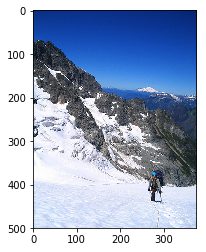

In [5]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# load the tokenizer
tokenizer = load(open('tokenizer_flickr.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model-ep004-loss3.516-val_loss3.849.h5')
# load and prepare the photograph
path = 'example.jpg'
plt.imshow(plt.imread(path))
photo = extract_features(path)
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)